## **IT3212 - Assignment 1 - Group 25**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from IPython.display import display, HTML

RANDOM_SEED = 0
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

- [Task 1 - Data Exploration](#task_1)
- [Task 2 - Data Cleaning](#task_2)
- [Task 3 - Handling Outliers](#task_3)
- [Task 4 - Data Transformation](#task_4)
- [Task 5 - Data Splitting](#task_5)
- [Task 6 - Bonus Task](#task_6)

 ___
 <a id='task_1'></a>
### **TASK 1 - Data Exploration (10p)**
___

**(a) Explore the dataset by**
- ✅ displaying the first few rows
- ✅ summary statistics
- ✅ data types of each column

**(b) Identify**
- ✅ missing values and outliers
- ✅ unique values in categorical columns

In [3]:
# Load in the datasets
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_oil = pd.read_csv('../data/oil.csv')
df_holidays_events = pd.read_csv('../data/holidays_events.csv')
df_stores = pd.read_csv('../data/stores.csv')
df_transactions = pd.read_csv('../data/transactions.csv')

In [4]:
# Rename columns with same column names
df_stores = df_stores.rename(columns={'type': 'type_stores'})
df_holidays_events = df_holidays_events.rename(columns={'type': 'type_holidays_events'})

In [5]:
# Convert to datetime
df_train['date'] = pd.to_datetime(df_train['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

In [6]:
df = pd.merge(df_train, df_transactions, on=['date', 'store_nbr'], how='left')
df = pd.merge(df, df_stores, on='store_nbr', how='left')
df = pd.merge(df, df_oil, on='date', how='left')
df = pd.merge(df, df_holidays_events, on='date', how='left')

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', None)

### **Display the first 5 rows**

In [8]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,city,state,type_stores,cluster,dcoilwtico,type_holidays_events,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.00,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.00,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.00,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.00,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.00,0,NaN,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


### **Display the summary statistics for numerical columns**

In [9]:
df.describe()

,id,date,store_nbr,sales,onpromotion,transactions,cluster,dcoilwtico
count,3054348.00,3054348,3054348.00,3054348.00,3054348.00,2805231.00,3054348.00,2099196.00
mean,1504276.78,2015-04-26 12:11:45.717619200,27.50,359.02,2.62,1697.07,8.48,68.02
min,0.00,2013-01-01 00:00:00,1.00,0.00,0.00,5.00,1.00,26.19
25%,754676.75,2014-03-01 00:00:00,14.00,0.00,0.00,1046.00,4.00,46.41
50%,1507571.50,2015-04-28 12:00:00,27.50,11.00,0.00,1395.00,8.50,53.43
75%,2255120.25,2016-06-22 00:00:00,41.00,196.01,0.00,2081.00,13.00,95.81
max,3000887.00,2017-08-15 00:00:00,54.00,124717.00,741.00,8359.00,17.00,110.62
std,866261.01,NaN,15.59,1107.29,12.25,966.83,4.65,25.69


### **Display the data type of each column**

In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    3054348 non-null  int64         
 1   date                  3054348 non-null  datetime64[ns]
 2   store_nbr             3054348 non-null  int64         
 3   family                3054348 non-null  object        
 4   sales                 3054348 non-null  float64       
 5   onpromotion           3054348 non-null  int64         
 6   transactions          2805231 non-null  float64       
 7   city                  3054348 non-null  object        
 8   state                 3054348 non-null  object        
 9   type_stores           3054348 non-null  object        
 10  cluster               3054348 non-null  int64         
 11  dcoilwtico            2099196 non-null  float64       
 12  type_holidays_events  502524 non-null   ob

### **Check for missing values**

In [11]:
df.isnull().sum()

id                            0
date                          0
store_nbr                     0
family                        0
sales                         0
onpromotion                   0
transactions             249117
city                          0
state                         0
type_stores                   0
cluster                       0
dcoilwtico               955152
type_holidays_events    2551824
locale                  2551824
locale_name             2551824
description             2551824
transferred             2551824
dtype: int64

### **Check for outliers**

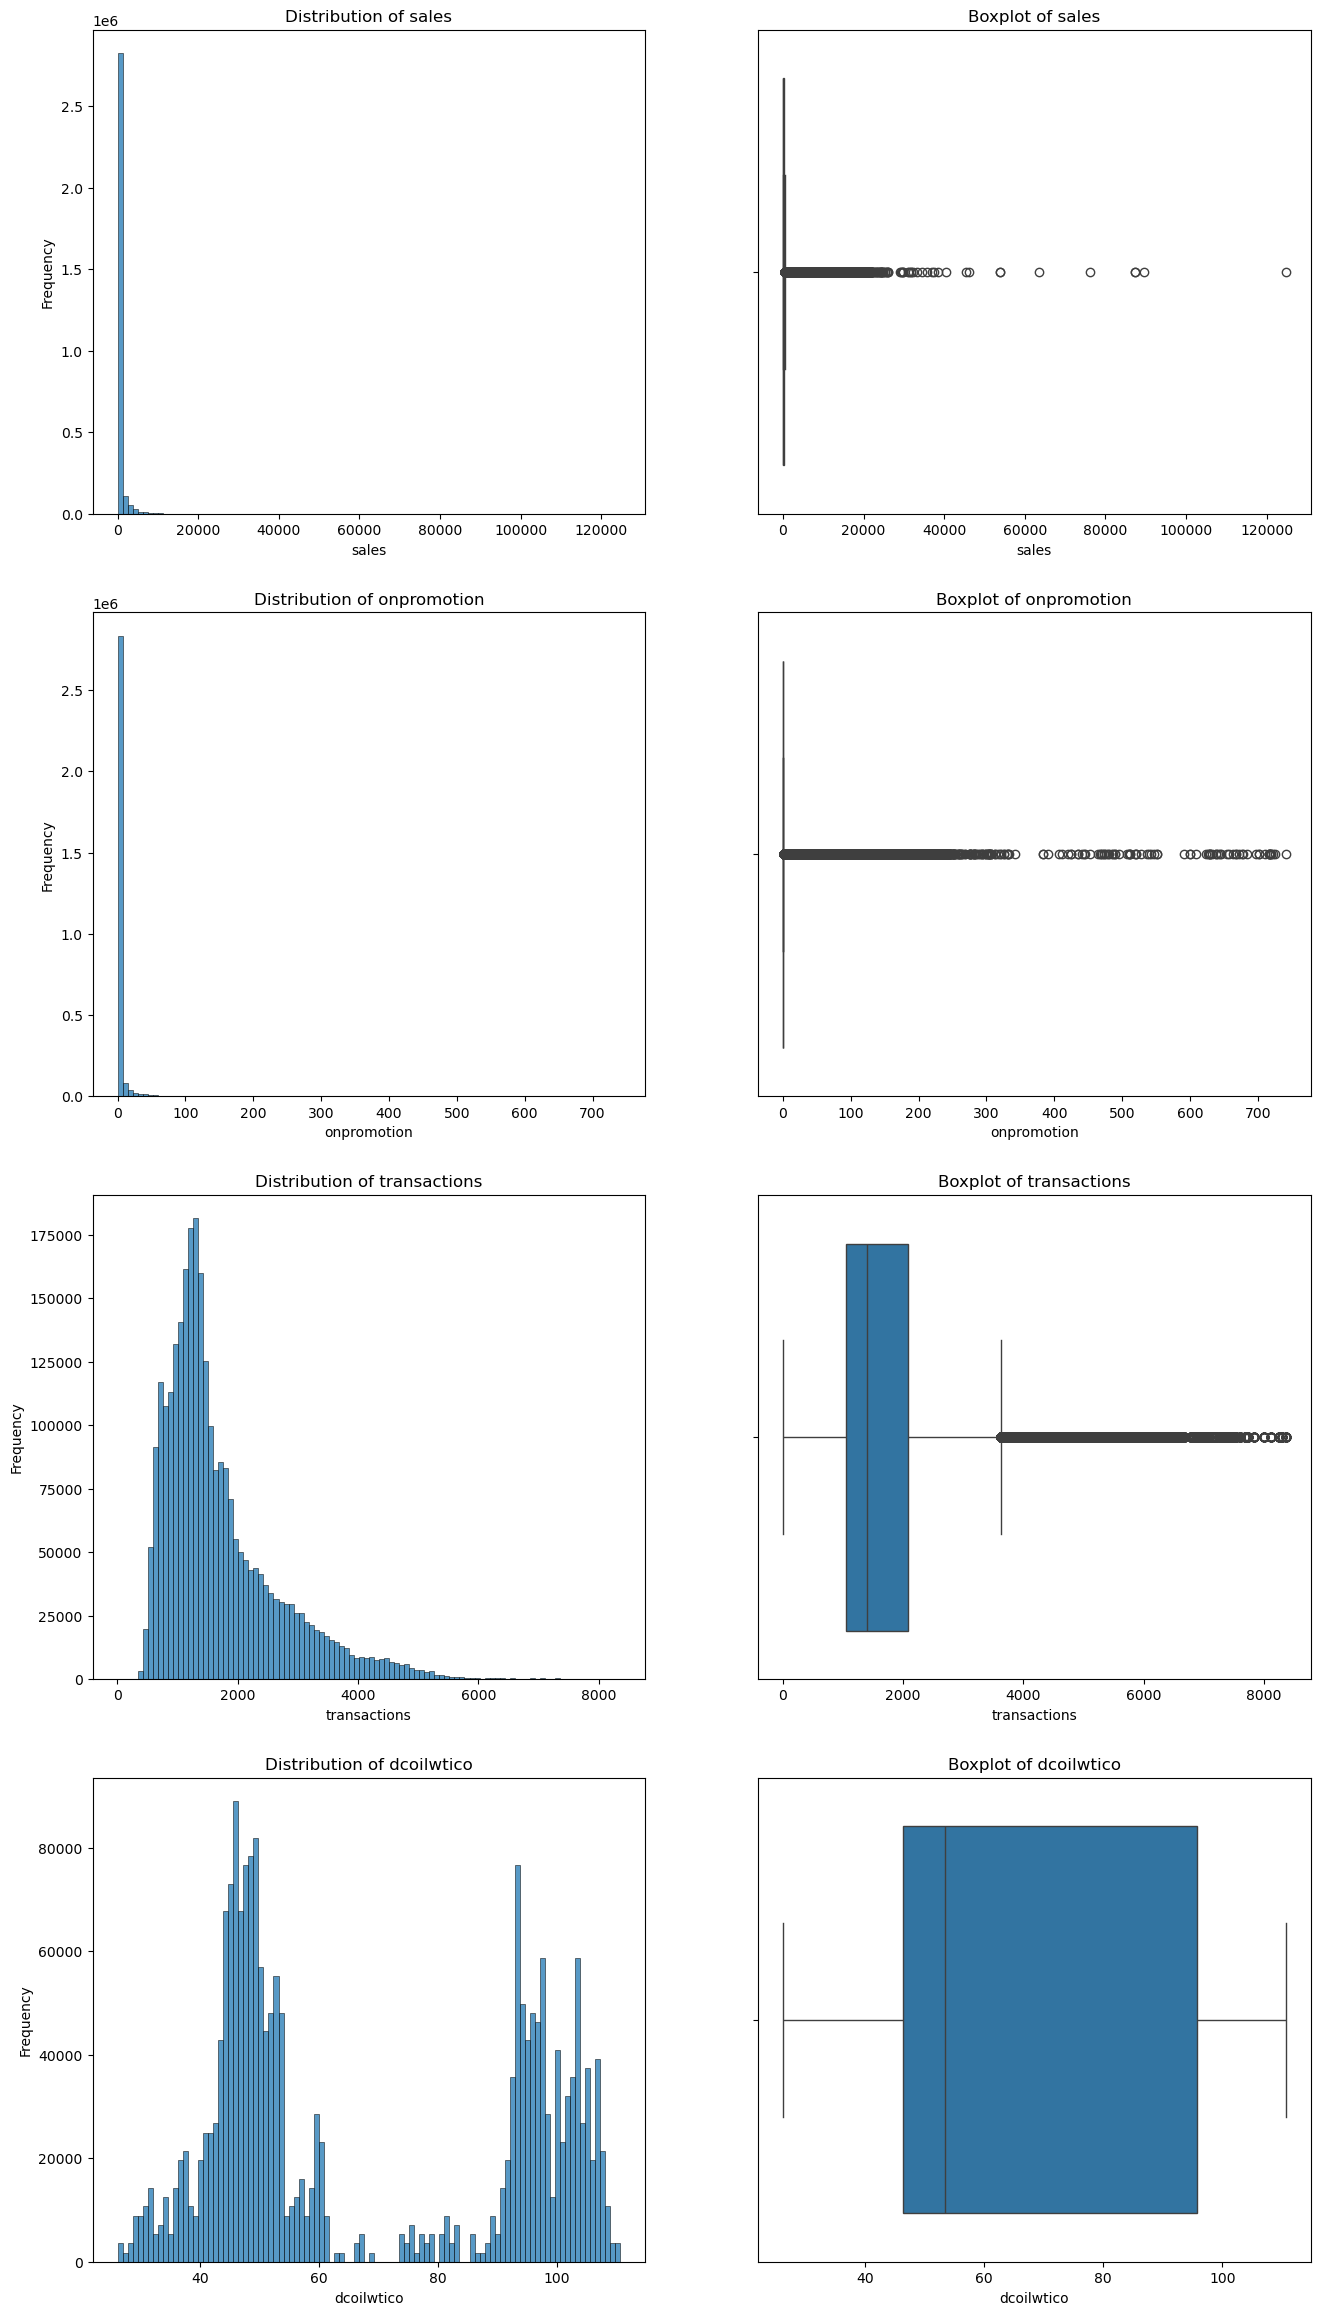

In [12]:
numerical_columns_of_interest = ['sales', 'onpromotion', 'transactions', 'dcoilwtico']
num_columns = len(numerical_columns_of_interest)

fig, axes = plt.subplots(nrows=num_columns, ncols=2, figsize=(14, num_columns * 6))
fig.tight_layout(pad=5.0)

for i, column in enumerate(numerical_columns_of_interest):
    sns.histplot(df[column], bins=100, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column}')
    axes[i, 1].set_xlabel(column)

plt.show()

### **Check for unique values in categorical columns**

In [13]:
display(
    HTML(
        pd.DataFrame(
            [
                {
                    "Column Name": column,
                    "Unique Values": ", ".join(map(str, df[column].unique())),
                }
                for column in df.select_dtypes(include=["object"]).columns
            ]
        ).to_html(index=False)
    )
)

Column Name,Unique Values
family,"AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOOKS, BREAD/BAKERY, CELEBRATION, CLEANING, DAIRY, DELI, EGGS, FROZEN FOODS, GROCERY I, GROCERY II, HARDWARE, HOME AND KITCHEN I, HOME AND KITCHEN II, HOME APPLIANCES, HOME CARE, LADIESWEAR, LAWN AND GARDEN, LINGERIE, LIQUOR,WINE,BEER, MAGAZINES, MEATS, PERSONAL CARE, PET SUPPLIES, PLAYERS AND ELECTRONICS, POULTRY, PREPARED FOODS, PRODUCE, SCHOOL AND OFFICE SUPPLIES, SEAFOOD"
city,"Quito, Cayambe, Latacunga, Riobamba, Ibarra, Santo Domingo, Guaranda, Puyo, Ambato, Guayaquil, Salinas, Daule, Babahoyo, Quevedo, Playas, Libertad, Cuenca, Loja, Machala, Esmeraldas, Manta, El Carmen"
state,"Pichincha, Cotopaxi, Chimborazo, Imbabura, Santo Domingo de los Tsachilas, Bolivar, Pastaza, Tungurahua, Guayas, Santa Elena, Los Rios, Azuay, Loja, El Oro, Esmeraldas, Manabi"
type_stores,"D, C, B, E, A"
type_holidays_events,"Holiday, nan, Work Day, Additional, Event, Transfer, Bridge"
locale,"National, nan, Local, Regional"
locale_name,"Ecuador, nan, Manta, Cotopaxi, Cuenca, Libertad, Riobamba, Puyo, Guaranda, Imbabura, Machala, Latacunga, El Carmen, Santo Domingo, Cayambe, Guayaquil, Esmeraldas, Ambato, Ibarra, Quevedo, Santo Domingo de los Tsachilas, Santa Elena, Quito, Loja, Salinas"
description,"Primer dia del ano, nan, Recupero puente Navidad, Recupero puente primer dia del ano, Carnaval, Fundacion de Manta, Provincializacion de Cotopaxi, Fundacion de Cuenca, Cantonizacion de Libertad, Cantonizacion de Riobamba, Viernes Santo, Dia del Trabajo, Dia de la Madre-1, Cantonizacion del Puyo, Dia de la Madre, Batalla de Pichincha, Cantonizacion de Guaranda, Provincializacion de Imbabura, Fundacion de Machala, Cantonizacion de Latacunga, Cantonizacion de El Carmen, Fundacion de Santo Domingo, Cantonizacion de Cayambe, Fundacion de Guayaquil-1, Fundacion de Guayaquil, Fundacion de Esmeraldas, Primer Grito de Independencia, Fundacion de Riobamba, Fundacion de Ambato, Fundacion de Ibarra, Cantonizacion de Quevedo, Independencia de Guayaquil, Traslado Independencia de Guayaquil, Dia de Difuntos, Independencia de Cuenca, Provincializacion de Santo Domingo, Provincializacion Santa Elena, Independencia de Guaranda, Independencia de Latacunga, Independencia de Ambato, Fundacion de Quito-1, Fundacion de Quito, Fundacion de Loja, Navidad-4, Navidad-3, Cantonizacion de Salinas, Navidad-2, Navidad-1, Navidad+1, Primer dia del ano-1, Inauguracion Mundial de futbol Brasil, Mundial de futbol Brasil: Ecuador-Suiza, Mundial de futbol Brasil: Ecuador-Honduras, Mundial de futbol Brasil: Ecuador-Francia, Mundial de futbol Brasil: Octavos de Final, Mundial de futbol Brasil: Cuartos de Final, Mundial de futbol Brasil: Semifinales, Mundial de futbol Brasil: Tercer y cuarto lugar, Mundial de futbol Brasil: Final, Black Friday, Cyber Monday, Recupero Puente Navidad, Puente Navidad, Puente Primer dia del ano, Recupero Puente Primer dia del ano, Terremoto Manabi, Terremoto Manabi+1, Terremoto Manabi+2, Terremoto Manabi+3, Terremoto Manabi+4, Terremoto Manabi+5, Terremoto Manabi+6, Terremoto Manabi+7, Terremoto Manabi+8, Terremoto Manabi+9, Terremoto Manabi+10, Terremoto Manabi+11, Terremoto Manabi+12, Terremoto Manabi+13, Terremoto Manabi+14, Terremoto Manabi+15, Terremoto Manabi+16, Terremoto Manabi+17, Terremoto Manabi+18, Terremoto Manabi+19, Terremoto Manabi+20, Terremoto Manabi+21, Terremoto Manabi+22, Terremoto Manabi+23, Terremoto Manabi+24, Terremoto Manabi+25, Terremoto Manabi+26, Terremoto Manabi+27, Terremoto Manabi+28, Terremoto Manabi+29, Terremoto Manabi+30, Traslado Batalla de Pichincha, Traslado Fundacion de Guayaquil, Traslado Primer Grito de Independencia, Puente Dia de Difuntos, Recupero Puente Dia de Difuntos, Traslado Primer dia del ano"
transferred,"False, nan, True"


___
### **TASK 2 - Data Cleaning (20p)**
___
**(a) Handling Missing Values** ✅ 

**(b) Choose appropriate methods to handle missing values** ✅ 

**(c) Justify your choices for handling missing data** ✅ 